<font size = "5"><b>ПРОЕКТНАЯ РАБОТА</b></font><br/>
<font size = "4.5"><b>СБОРНЫЙ ПРОЕКТ</b></font><br/>
<font size = "4"><b>Анализ продаж компьютерных игр</b></font>

<a name = "0.0"></a><font size = "4"><b>Содержание</b></font><br/>
* [0. Описание проекта](#0.)
* [1. Изучение общей информации и подготовка данных](#1.)
    - [1.1 Общая информация](#1.1.)
    - [1.2 Приведение таблицы в рабочий вид](#1.2.)
    - [1.3 Корректировка пропусков](#1.3.)
    - [1.4 Изменение типа данных](#1.4.)
* [2. Проведение исследовательского анализа данных](#2.)
    - [2.1 Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?](#2.1.)
    - [2.2 Как менялись продажи по платформам](#2.2.)
    - [2.3 Построим прогноз на 2017 год](#2.3.)
    - [2.4 Определим лидирущие плаформы по продажам и построим график «ящик с усами»](#2.4.)
    - [2.5 Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков](#2.5.)
    - [2.6 Соотнесем выводы с продажами игр на других платформах и посмотрим на общее распределение игр по жанрам](#2.6.)
* [3. Создание портрета пользователя каждого региона](#3.)
    - [3.1 Самые популярные платформы (топ-5)](#3.1.)
    - [3.2 Самые популярные жанры (топ-5)](#3.2.)
    - [3.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе?](#3.3.)
* [4. Проверка гипотез](#4.)
    - [4.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#4.1.)
    - [4.2 Средние пользовательские рейтинги жанров Action и Sports разные](#4.2.)
* [5. Общий вывод](#5.)

<a name = "0."></a><font size = "4"><b>0. Описание проекта</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

Мы работаем в интернет-магазине <b>«Стримчик»</b>, который продаёт по всему миру
компьютерные игры.<br/>
<i>У нас имеются данные до 2016 года:</i><br/>
- о продажах игр, оценки пользователей и экспертов.
- жанры и платформы (например, Xbox или PlayStation).

Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный
продукт и спланировать рекламные кампании.

<b>Примечание:</b><br/>
- в наборе данных попадается аббревиатура <i>ESRB</i>. (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, <i>«Для взрослых»</i>, <i>«Для детей младшего возраста»</i> или <i>«Для подростков»</i>.
- данные за 2016 год могут быть неполными.

<b>Описание данных:</b><br/>
* `Name` — название игры;
* `Platform` — платформа;
* `Year`_of_Release — год выпуска;
* `Genre` — жанр игры;
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий);
* `EU_sales` — продажи в Европе (миллионы проданных копий);
* `JP_sales` — продажи в Японии (миллионы проданных копий);
* `Other_sales` — продажи в других странах (миллионы проданных копий);
* `Critic_Score` — оценка критиков (максимум 100);
* `User_Score` — оценка пользователей (максимум 10);
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

<b>Этапы выполнения проекта:</b><br/>
1. Изучение общей информации и подготовка данных
2. Проведение исследовательского анализа данных
3. Создание портрета пользователя каждого региона
4. Проверка гипотез
5. Общий вывод

**Гипотезы:**<br/>
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* Средние пользовательские рейтинги жанров Action и Sports разные.

<a name = "1."></a><font size = "4"><b>1. Изучение общей информации и подготовка данных</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

In [150]:
# добавим библиотеки
import matplotlib.pyplot as plt # библиотека для визуализации данных
import numpy as np # библиотека предоставляющая общие математические и числовые операции в виде функций
from scipy import stats as st # пакет статистических функций
import pandas as pd # библиотека для обработки и анализа данных
import seaborn as sns # библиотека шаблонов для статистической визуализации
import math as mt # пакет математических функций

In [151]:
# импортируем данные
try:
    df = pd.read_csv('games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')

<a name = "1.1."></a><font size = "3"><b>1.1 Общая информация</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>
Посмотрим информацию по таблице, определим недочеты, проведем корректировку данных.

In [152]:
print('---------------------------------------------------Общая таблица:---------------------------------------------------')
display(df)
print('----------------------Основные статистические данные:----------------------')
display(df.describe())
print('----------Краткая сводка данных:----------')
print()
df.info()

---------------------------------------------------Общая таблица:---------------------------------------------------


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


----------------------Основные статистические данные:----------------------


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


----------Краткий сводка данных:----------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [153]:
# посмотрим сколько у нас пропусков
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [154]:
# посмотрим есть ли дубликаты по таблице
print('Дубликаты по таблице:', df.duplicated().sum())
print('Дубликаты по нескольким столбцам:', df.duplicated(subset = ['Name', 'Platform']).sum())

Дубликаты по таблице: 0
Дубликаты по нескольким столбцам: 5


In [155]:
# у нас есть дубликаты посмотрим, что они из себя представляют
df[df.duplicated(subset = ['Name', 'Platform'])]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


In [156]:
# а если посмотреть еще по одному столбцу (возьмем год)
print('Дубликаты по нескольким столбцам:', df.duplicated(subset = ['Name', 'Platform', 'Year_of_Release']).sum())

Дубликаты по нескольким столбцам: 2


In [157]:
# добавим еще несколько столбцов
print('Дубликаты по нескольким столбцам:', df.duplicated(subset = ['Name', 'Platform', 'Year_of_Release', 'Genre', 'Rating']).sum())

Дубликаты по нескольким столбцам: 2


In [158]:
# уже интересно, посмотрим
df[df.duplicated(subset = ['Name', 'Platform', 'Year_of_Release', 'Genre', 'Rating'])]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


In [159]:
# удалим дубликаты
df = df.drop_duplicates(subset = ['Name', 'Platform', 'Year_of_Release', 'Genre', 'Rating']).reset_index(drop = True)
print('Осталось дубликатов:', df.duplicated(subset = ['Name', 'Platform', 'Year_of_Release', 'Genre', 'Rating']).sum())

Осталось дубликатов: 0


**Вывод:**

1. откорректируем название столбцов(переведем в нижний регистр, переименнуем) - делаем для удобства;
2. в столбце изменим тип данных на целочисленный;
3. думаю стоит перевести все строковые данные в нижний регистр, чтобы не возникло ошибок при дальнейшей обработки;
4. в названиях игры имеются дубликаты, но это связано с тем, что одна игра находиться на разных платформах;
5. в продажах есть нулевые значения, видимо игры себя не оправдали и продаж не было;
6. есть пропуски в оценке игр, нужно будет проверить по какой причине и возможно ли их восстановить.
7. добавим колонку с общими продажами.

<a name = "1.2."></a><font size = "3"><b>1.2 Приведение таблицы в рабочий вид</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

In [160]:
# переименнуем название столбцов
df = df.rename(columns = {
    'Name':'name',
    'Platform':'platform',
    'Year_of_Release':'release',
    'Genre':'genre',
    'NA_sales':'na_sale',
    'EU_sales':'eu_sale',
    'JP_sales':'jp_sale',
    'Other_sales':'other_sale',
    'Critic_Score':'cr_sc',
    'User_Score':'us_sc',
    'Rating':'rating'
    }
)

# добавим колонку с общими продажами
df['total_sale'] = df['na_sale'] + df['eu_sale'] + df['jp_sale'] + df['other_sale']

df.head()

,name,platform,release,genre,na_sale,eu_sale,jp_sale,other_sale,cr_sc,us_sc,rating,total_sale
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [161]:
# переведем все значения в нижний регистр
df.name = df.name.str.lower()
df.platform = df.platform.str.lower()
df.genre = df.genre.str.lower()
df.rating = df.rating.str.lower()

df.head()

,name,platform,release,genre,na_sale,eu_sale,jp_sale,other_sale,cr_sc,us_sc,rating,total_sale
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e,82.54
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e,32.77
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


<a name = "1.3."></a><font size = "3"><b>1.3 Корректировка пропусков</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

In [162]:
# посмотрим пропуски в столбце name
df[df.name.isna()]

,name,platform,release,genre,na_sale,eu_sale,jp_sale,other_sale,cr_sc,us_sc,rating,total_sale
659,NaN,gen,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN,2.39


**Вывод:** Сразу видим, что пропуски имеются и в столбце `genre`, и в оценках. Больше всего популярна игра была в Северной Америке потом в Европе, но никаких оценок нет. Восстановить пропущенные ячейки в строке мы не сможем. Удалим строку не большая будет потеря.

In [163]:
# удалим строку 659
df = df.dropna(subset = ['name'])
df.name.isna().sum()

0

In [164]:
# посмотрим на пропуски в столбце выхода игр
df[df.release.isna()]

,name,platform,release,genre,na_sale,eu_sale,jp_sale,other_sale,cr_sc,us_sc,rating,total_sale
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,e,5.24
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,e,3.50
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,e10+,3.06
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...
16371,pdc world championship darts 2008,psp,NaN,sports,0.01,0.00,0.00,0.00,43.0,tbd,e10+,0.01
16403,freaky flyers,gc,NaN,racing,0.01,0.00,0.00,0.00,69.0,6.5,t,0.01
16446,inversion,pc,NaN,shooter,0.01,0.00,0.00,0.00,59.0,6.7,m,0.01
16456,hakuouki: shinsengumi kitan,ps3,NaN,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [165]:
print('Всего пропусков:', df.release.isna().sum(), ', а это', round((df.release.isna().sum() / len(df)) * 100, 1), '%')

Всего пропусков: 269 , а это 1.6 %


**Вывод:** Всего 269 строк с пропусками и это менее 2%. Поэтому попращаемся с этими строками тоже.

In [166]:
df = df.dropna(subset = ['release'])
df.release.isna().sum()

0

**Entertainment Software Rating Board (ESRB)** — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.

**Категории рейтинга:**<br/>
* «EC» («Early childhood») — «Для детей младшего возраста от 3 лет»
* «E» («Everyone», gервоначально "K-A" ("Kids to Adults")) — «Для всех от 6 лет»
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
* «T» («Teen») — «Подросткам»
* «M» («Mature») — «Для взрослых»
* «AO» («Adults Only 18+») — «Только для взрослых»
* «RP» («Rating Pending») — «Рейтинг ожидается»

Рейтинг индивидуальная оценка и заменить на медианное или среднее значение мы не можем и удалить значения мы тоже не можем, т.к. пропущенных значений 6766. Некоторые группы рейтинга можно объединить и есть категория RP, где рейтинга как такого нет. Поэтому предлагаем пропущенные значения заменить эту категорию. Также объединим категории детей и для взрослых.



In [167]:
# посмотрим пропуски в столбце рейтинга
df[df.rating.isna()]

,name,platform,release,genre,na_sale,eu_sale,jp_sale,other_sale,cr_sc,us_sc,rating,total_sale
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,duck hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,nintendogs,ds,2005.0,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16709,lma manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16710,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,spirits & spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [168]:
# посмотрим какие категории рейтинга у нас есть
df.rating.value_counts(dropna = False)

NaN     6676
e       3920
t       2905
m       1536
e10+    1393
ec         8
k-a        3
rp         1
ao         1
Name: rating, dtype: int64

In [169]:
# объединим категории
df.loc[df['rating'].isin(['ec', 'k-a']), 'rating'] = 'e'
df.loc[df.rating.isna(), 'rating'] = 'rp'
df.loc[df['rating'].isin(['ao']), 'rating'] = 'm'
print(df.rating.value_counts())
print()
print('Отлично, у нас получилось пять категорий рейтинга')

rp      6677
e       3931
t       2905
m       1537
e10+    1393
Name: rating, dtype: int64

Отлично, у нас получилось пять категорий рейтинга


In [170]:
# посмотрим уникальные значения столбцов с оценками
df.cr_sc.unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

**Замечание:** Пропуски оценок заполнить мы не можем - заполним ячейки `значением-заглушкой`, чтобы было удобней работать с числами, все оценки округлены, поэтому можем изменить тип данных столбца до целых.

In [171]:
df.loc[df.cr_sc.isna(), 'cr_sc'] = -1
print('Количество пустых строк:', df.cr_sc.isna().sum())

Количество пустых строк: 0


In [172]:
df.us_sc.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

**Замечание:** с Пустыми значениями поступим как и делали ранее. Имеется значение `tbd` - посмотрим на строки и определим, что будем делать.

In [173]:
df[df['us_sc'] == 'tbd']

,name,platform,release,genre,na_sale,eu_sale,jp_sale,other_sale,cr_sc,us_sc,rating,total_sale
119,zumba fitness,wii,2010.0,sports,3.45,2.59,0.0,0.66,-1.0,tbd,e,6.70
301,namco museum: 50th anniversary,ps2,2005.0,misc,2.08,1.35,0.0,0.54,61.0,tbd,e10+,3.97
520,zumba fitness 2,wii,2011.0,sports,1.51,1.03,0.0,0.27,-1.0,tbd,t,2.81
645,udraw studio,wii,2010.0,misc,1.65,0.57,0.0,0.20,71.0,tbd,e,2.42
718,just dance kids,wii,2010.0,misc,1.52,0.54,0.0,0.18,-1.0,tbd,e,2.24
...,...,...,...,...,...,...,...,...,...,...,...,...
16693,planet monsters,gba,2001.0,action,0.01,0.00,0.0,0.00,67.0,tbd,e,0.01
16695,bust-a-move 3000,gc,2003.0,puzzle,0.01,0.00,0.0,0.00,53.0,tbd,e,0.01
16696,mega brain boost,ds,2008.0,puzzle,0.01,0.00,0.0,0.00,48.0,tbd,e,0.01
16702,plushees,ds,2008.0,simulation,0.01,0.00,0.0,0.00,-1.0,tbd,e,0.01


После уточнения мы узнали, что **TBD** - аббревиатура от английского **To Be Determined** (будет определено) или **To Be Decided** (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований.

Получается, что это те же самые пропуски и примем решение сделать аналогично `cr_sc`.

In [174]:
df.loc[df.us_sc.isna(), 'us_sc'] = -1
print('Количество пустых строк:', df.us_sc.isna().sum())
df.loc[df['us_sc'] == 'tbd', 'us_sc'] = -1
print('Количество tbd строк:', df[df['us_sc'] == 'tbd']['us_sc'].sum())

Количество пустых строк: 0
Количество tbd строк: 0


In [175]:
# посмотрим общую информацию по датафрейму
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        16443 non-null  object 
 1   platform    16443 non-null  object 
 2   release     16443 non-null  float64
 3   genre       16443 non-null  object 
 4   na_sale     16443 non-null  float64
 5   eu_sale     16443 non-null  float64
 6   jp_sale     16443 non-null  float64
 7   other_sale  16443 non-null  float64
 8   cr_sc       16443 non-null  float64
 9   us_sc       16443 non-null  object 
 10  rating      16443 non-null  object 
 11  total_sale  16443 non-null  float64
dtypes: float64(7), object(5)
memory usage: 1.6+ MB


<a name = "1.4."></a><font size = "3"><b>1.4 Изменение типа данных</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

In [176]:
df.release = df.release.astype('int64')
df.na_sale = df.na_sale.astype('float')
df.eu_sale = df.eu_sale.astype('float')
df.jp_sale = df.jp_sale.astype('float')
df.other_sale = df.other_sale.astype('float')
df.cr_sc = df.cr_sc.astype('int64')
df.us_sc = df.us_sc.astype('float')
df.total_sale = df.total_sale.astype('float')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        16443 non-null  object 
 1   platform    16443 non-null  object 
 2   release     16443 non-null  int64  
 3   genre       16443 non-null  object 
 4   na_sale     16443 non-null  float64
 5   eu_sale     16443 non-null  float64
 6   jp_sale     16443 non-null  float64
 7   other_sale  16443 non-null  float64
 8   cr_sc       16443 non-null  int64  
 9   us_sc       16443 non-null  float64
 10  rating      16443 non-null  object 
 11  total_sale  16443 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.6+ MB


,name,platform,release,genre,na_sale,eu_sale,jp_sale,other_sale,cr_sc,us_sc,rating,total_sale
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1,-1.0,rp,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1,-1.0,rp,31.38


**Вывод:** Переименовали название столбцов, изменили типы столбцов, привели все значения к нижнему регистру, некоторые пропуски удалили (менее 2%), пустые значения в столбцах оценки заменили на "значение-заглушка", в столбце рейтинга - ожидание рейтинга и некоторые категории объединили.
Откорректировали датафрейм и теперь перейдем к анализу данных.

<a name = "2."></a><font size = "4"><b>2. Проведение исследовательского анализа данных</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

<a name = "2.1."></a><font size = "3"><b>2.1 Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

In [177]:
years = df.pivot_table(index = 'release', values = 'name', aggfunc = 'count')
years.columns = ['count']
years

,count
release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


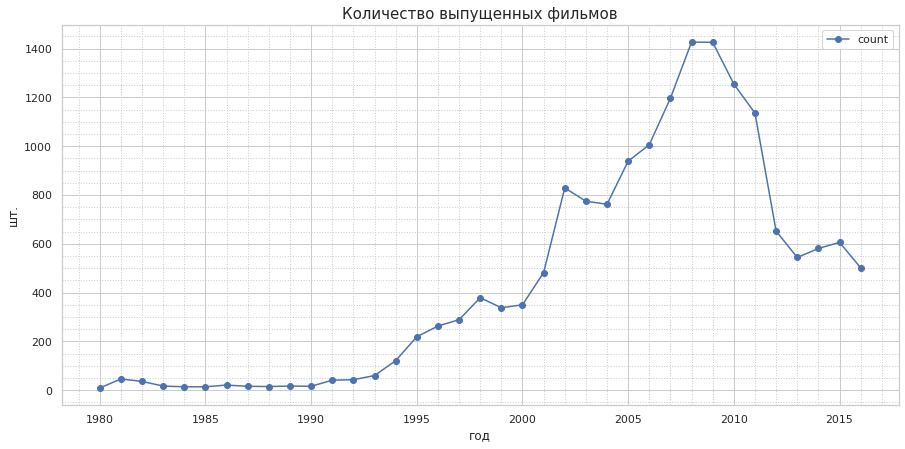

In [178]:
years.plot(style = 'o-', figsize = (15, 7))
plt.minorticks_on()
plt.grid(which = 'minor', linestyle = ':')
plt.ylabel('шт.')
plt.xlabel('год')
plt.title('Количество выпущенных фильмов', fontsize = 15)
plt.show()

**Вывод:** Не все данные важны, т.к. с 1980 по 1994 гг. мало выпускалось игр, скорее всего в силу слабого развития технологий. И только после 1994 года начался прогресс в развитии компьютерных игр с появлением компьютеров, а с 2000-х был сильный скачок вверх по популярности игр. Но с 2009 года видим спад, возможно, это связано с потерей интереса к играм из-за развития друго плана технологий.

<a name = "2.2."></a><font size = "3"><b>2.2 Как менялись продажи по платформам</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.
За какой характерный срок появляются новые и исчезают старые платформы?

In [179]:
# посмотрим сколько игры было выпущено до 1993 года
print('До 1993 года было выпущено:', df.query('1980 < release < 1993')['name'].count())

До 1993 года было выпущено: 296


In [180]:
# отфильтруем игры до 1993 года
df = df.query('release > 1993')
# dыберем платформы с наибольшими суммарными продажами и построим распределение по годам
sale = df.pivot_table(index = ['platform', 'release'], values = 'total_sale', aggfunc = 'sum')
sale = sale.sort_values('total_sale', ascending = False)
sale

total_sale
platform release            
ps2      2004         211.81
wii      2009         206.97
ps2      2002         205.38
         2003         184.31
wii      2008         171.32
...                      ...
gba      2000           0.07
dc       2008           0.04
pcfx     1996           0.03
dc       2007           0.02
3do      1994           0.02

[197 rows x 1 columns]

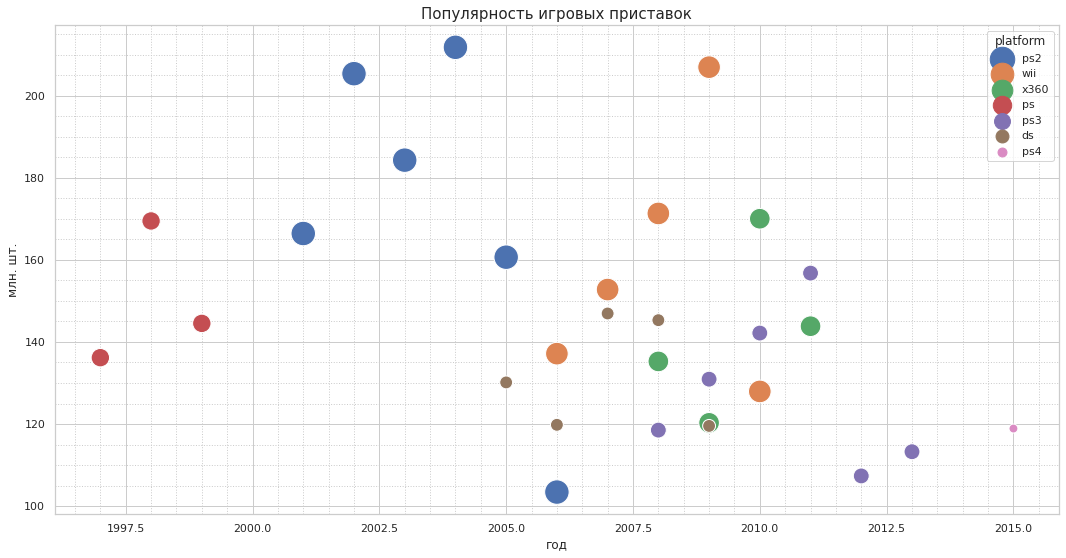

In [181]:
# возьмем платформы с наибольшими продажами от 100 млн.
sale = sale.query('total_sale > 100')
plt.figure(figsize = (18,9))
sns.scatterplot(x = 'release', y = 'total_sale', hue = 'platform', data = sale, size = 'platform', sizes = (80, 600))
plt.minorticks_on()
plt.grid(which = 'minor', linestyle = ':')
plt.ylabel('млн. шт.')
plt.xlabel('год')
plt.title('Популярность игровых приставок', fontsize = 15)
plt.show()

In [182]:
# посмотрим продаваймость игр на платформе PS
s = sale.query('platform == ["ps", "ps2", "ps3", "ps4"]')
s = s.sort_values('release', ascending = False)
s

total_sale
platform release            
ps4      2015         118.90
ps3      2013         113.25
         2012         107.35
         2011         156.78
         2010         142.17
         2009         130.93
         2008         118.52
ps2      2006         103.42
         2005         160.66
         2004         211.81
         2003         184.31
         2002         205.38
         2001         166.43
ps       1999         144.53
         1998         169.49
         1997         136.17

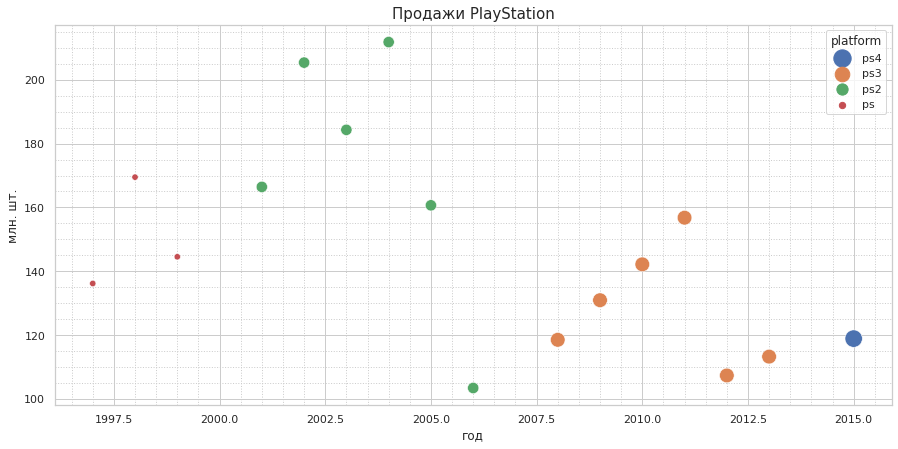

In [183]:
plt.figure(figsize = (15,7))
sns.scatterplot(x = 'release', y = 'total_sale', hue = 'platform', data = s, size = 'platform', sizes = (40, 300))
plt.minorticks_on()
plt.grid(which = 'minor', linestyle = ':')
plt.ylabel('млн. шт.')
plt.xlabel('год')
plt.title('Продажи PlayStation', fontsize = 15)
plt.show()

In [184]:
# посмотрим сколько существовали платформы
year = df.loc[:, ['release', 'platform']].drop_duplicates().pivot_table(index = 'platform', values = 'release', aggfunc='count')
year = year.sort_values('release', ascending = False)
year

,release
platform,
pc,23
ps2,12
psp,12
x360,12
wii,11
ps3,11
ds,10
ps,10
xb,9


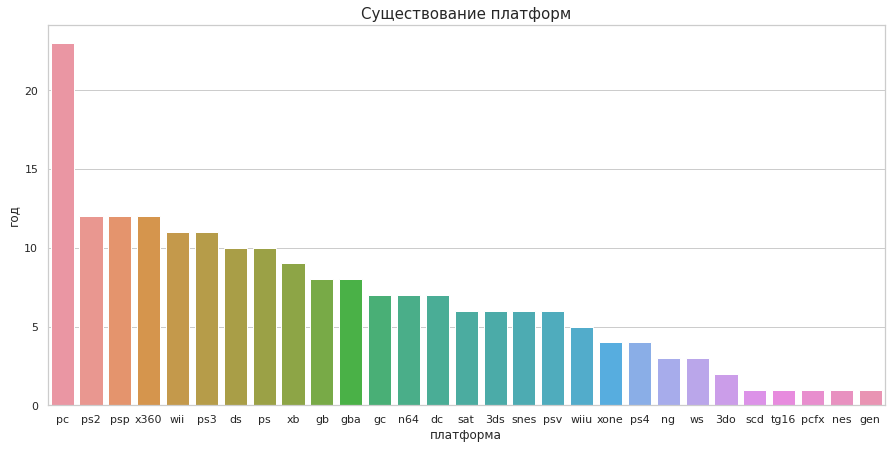

In [185]:
# построим график
plt.figure(figsize = (15,7))
sns.barplot(data = year, y = 'release', x = year.index)
plt.ylabel('год')
plt.xlabel('платформа')
plt.title('Существование платформ', fontsize = 15)
plt.show()

In [186]:
year.describe()

,release
count,29.000000
mean,6.793103
std,4.813518
min,1.000000
25%,3.000000
50%,6.000000
75%,10.000000
max,23.000000


**Вывод:** Самыми продаваемыми играми были игры на PlayStation с 1997 года и пиком продаж с 2001 по 2006 гг. В 1998 году пик продаж PS составляет 169 млн. копий, PS2 в 2006 году составляет 211 млн. копий, PS3 в 2011 году - 156 млн. копий и PS4 в 2015 году - 118 млн. копий. Также были популярны wii в 2009 году продано 171 млн. копий, и X360 в 2010 году - 170 млн. копий.

Средний срок жизни игровой платформы - 6 лет.

<a name = "2.3."></a><font size = "3"><b>2.3 Построим прогноз на 2017 год</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

Возьмем данные c 2013 года, т.к. это будут самые актуальные данные - 3 года и часть 2016 г.

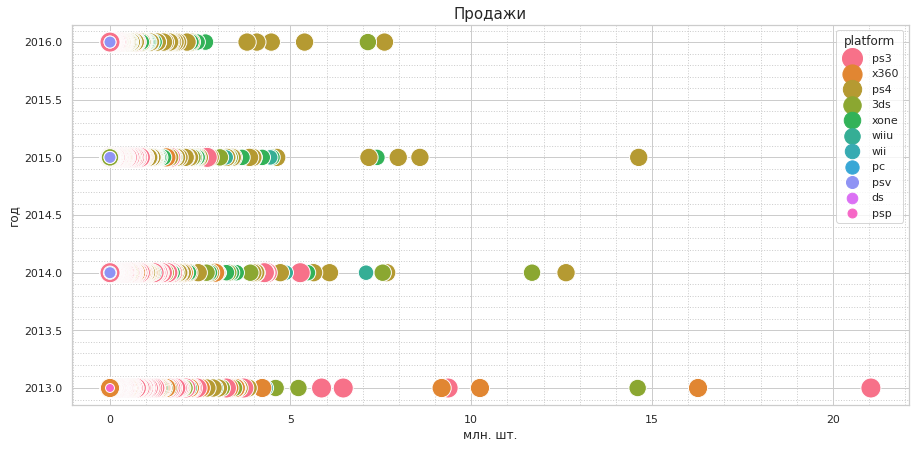

In [187]:
df_2012 = df.query('release > 2012')
plt.figure(figsize = (15,7))
sns.scatterplot(x = 'total_sale', y = 'release', hue = 'platform', data = df_2012, size = 'platform', sizes = (80, 400))
plt.minorticks_on()
plt.grid(which = 'minor', linestyle = ':')
plt.ylabel('год')
plt.xlabel('млн. шт.')
plt.title('Продажи', fontsize = 15)
plt.show()

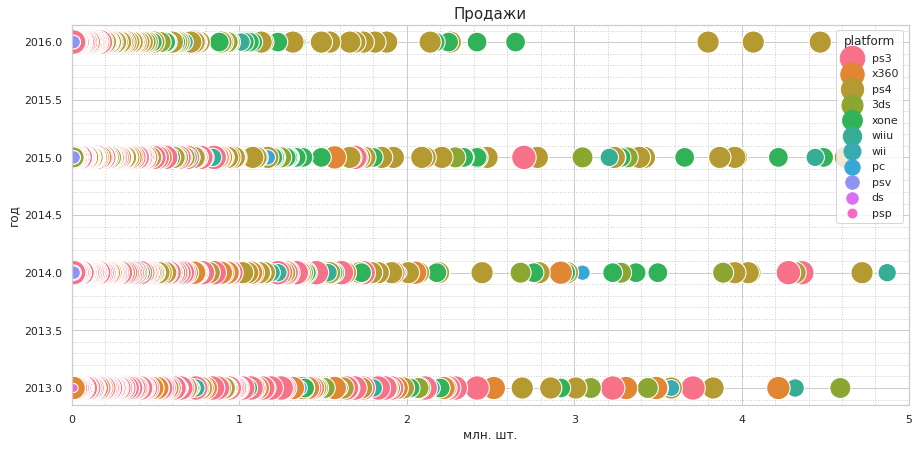

In [188]:
# и посмотрим поближе
plt.figure(figsize = (15,7))
sns.scatterplot(x = 'total_sale', y = 'release', hue = 'platform', data = df_2012, size = 'platform', sizes = (80, 600))
plt.xlim(0, 5)
plt.minorticks_on()
plt.grid(which = 'minor', linestyle = ':')
plt.ylabel('год')
plt.xlabel('млн. шт.')
plt.title('Продажи', fontsize = 15)
plt.show()

Отметим топ 5 платформ

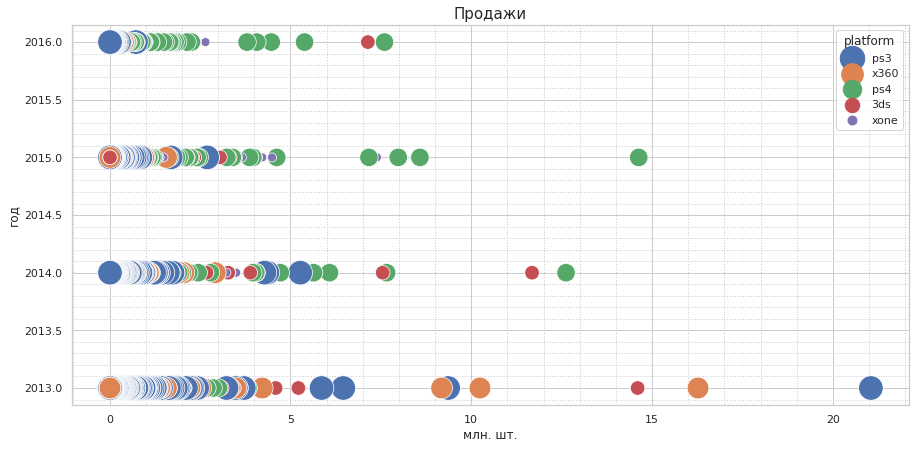

In [189]:
df_5_2012 = df.query('release > 2012 & platform == ["ps3", "x360", "ps4", "3ds", "xone"]')
plt.figure(figsize = (15,7))
sns.scatterplot(x = 'total_sale', y = 'release', hue = 'platform', data = df_5_2012, size = 'platform', sizes = (80, 600))
plt.minorticks_on()
plt.grid(which = 'minor', linestyle = ':')
plt.ylabel('год')
plt.xlabel('млн. шт.')
plt.title('Продажи', fontsize = 15)
plt.show()

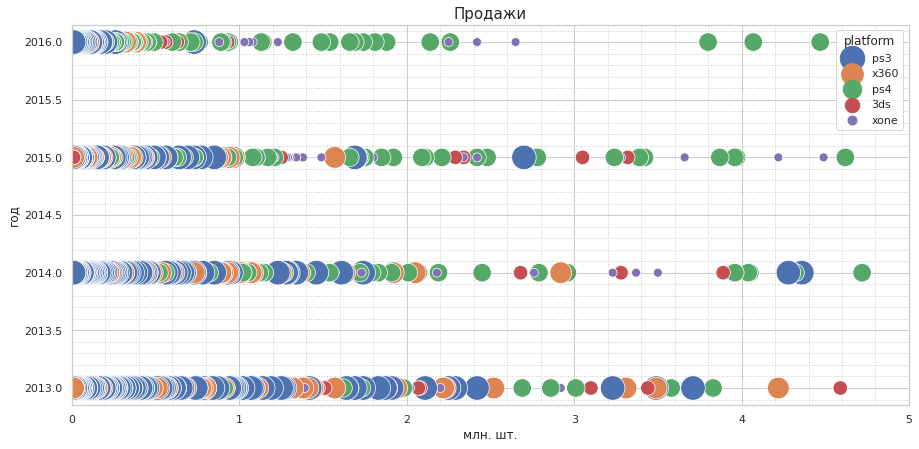

In [190]:
# и посмотрим поближе
plt.figure(figsize = (15,7))
sns.scatterplot(x = 'total_sale', y = 'release', hue = 'platform', data = df_5_2012, size = 'platform', sizes = (80, 600))
plt.xlim(0, 5)
plt.minorticks_on()
plt.grid(which = 'minor', linestyle = ':')
plt.ylabel('год')
plt.xlabel('млн. шт.')
plt.title('Продажи', fontsize = 15)
plt.show()

**Вывод:** Можно отметить, что за последние несколько лет стала преобладать платформа ps4 с положительной динамикой от старта продаж. И выделенные платформы постепенно уходят в тень.

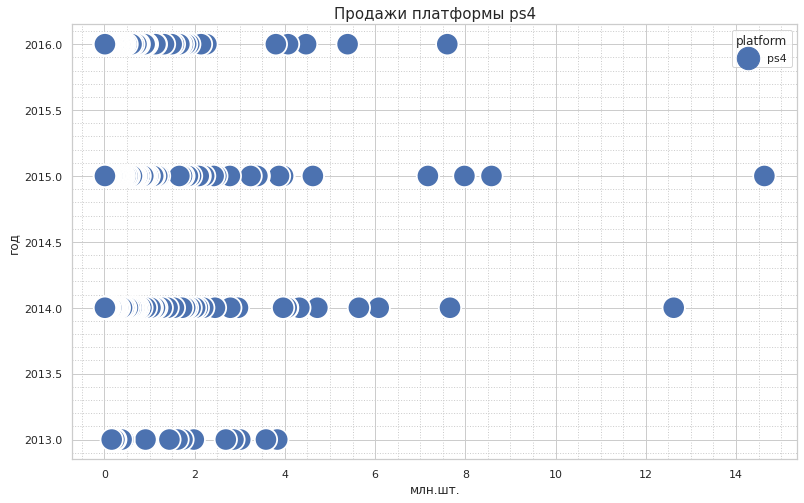

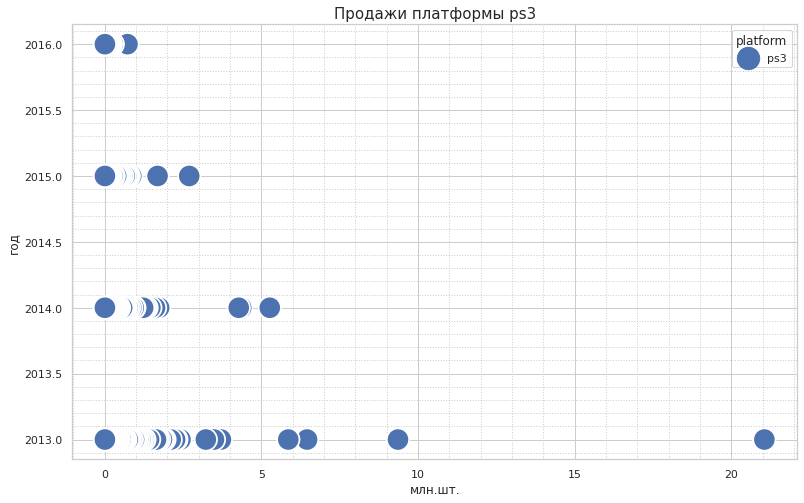

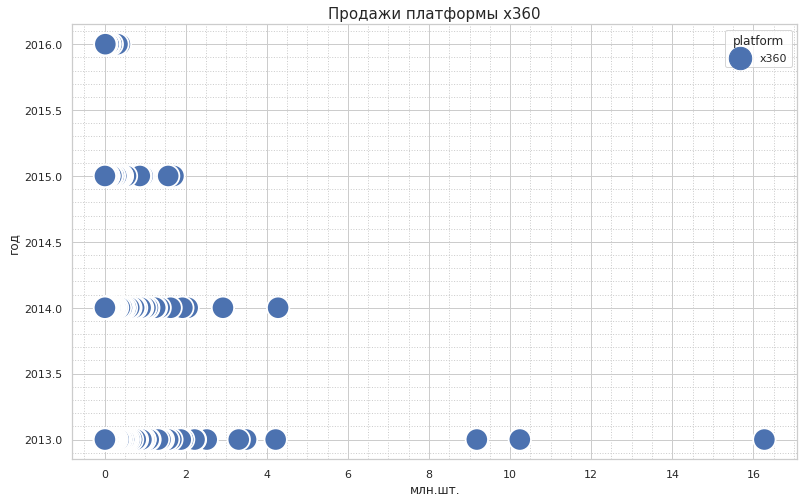

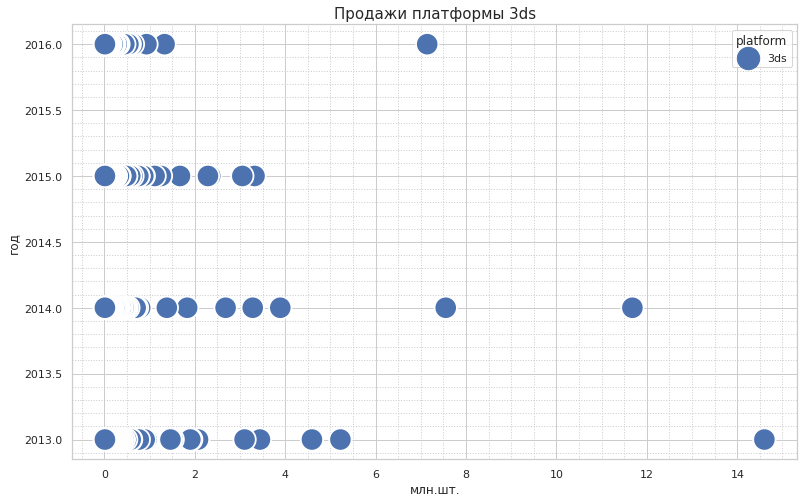

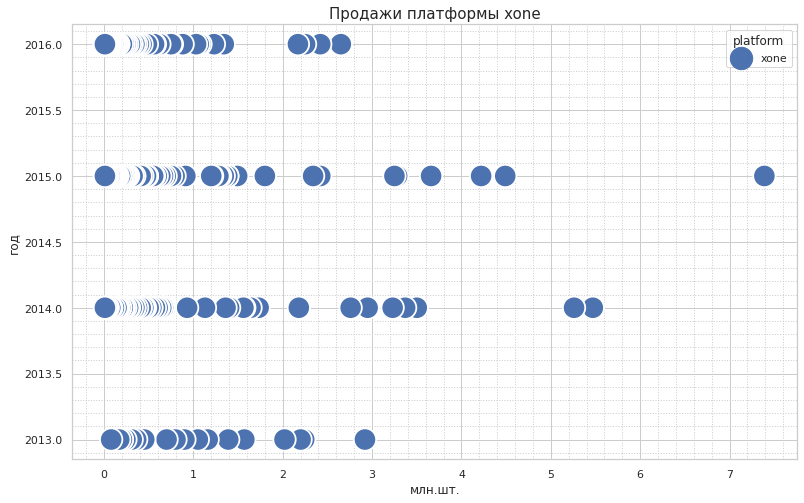

In [191]:
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (13, 8))
sns.scatterplot(data = df_5_2012.query('platform == "ps4"'), x = 'total_sale', y = 'release', hue = 'platform', size = 'platform', sizes = (500, 100), marker = 'o')
plt.minorticks_on()
plt.grid(which = 'minor', linestyle = ':')
plt.ylabel('год')
plt.xlabel('млн.шт.')
plt.title('Продажи платформы ps4', fontsize = 15)
plt.show()

sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (13, 8))
sns.scatterplot(data = df_5_2012.query('platform == "ps3"'), x = 'total_sale', y = 'release', hue = 'platform', size = 'platform', sizes = (500, 100), marker = 'o')
plt.minorticks_on()
plt.grid(which = 'minor', linestyle = ':')
plt.ylabel('год')
plt.xlabel('млн.шт.')
plt.title('Продажи платформы ps3', fontsize = 15)
plt.show()

sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (13, 8))
sns.scatterplot(data = df_5_2012.query('platform == "x360"'), x = 'total_sale', y = 'release', hue = 'platform', size = 'platform', sizes = (500, 100), marker = 'o')
plt.minorticks_on()
plt.grid(which = 'minor', linestyle = ':')
plt.ylabel('год')
plt.xlabel('млн.шт.')
plt.title('Продажи платформы x360', fontsize = 15)
plt.show()

sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (13, 8))
sns.scatterplot(data = df_5_2012.query('platform == "3ds"'), x = 'total_sale', y = 'release', hue = 'platform', size = 'platform', sizes = (500, 100), marker = 'o')
plt.minorticks_on()
plt.grid(which = 'minor', linestyle = ':')
plt.ylabel('год')
plt.xlabel('млн.шт.')
plt.title('Продажи платформы 3ds', fontsize = 15)
plt.show()

sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (13, 8))
sns.scatterplot(data = df_5_2012.query('platform == "xone"'), x = 'total_sale', y = 'release', hue = 'platform', size = 'platform', sizes = (500, 100), marker = 'o')
plt.minorticks_on()
plt.grid(which = 'minor', linestyle = ':')
plt.ylabel('год')
plt.xlabel('млн.шт.')
plt.title('Продажи платформы xone', fontsize = 15)
plt.show()

**Вывод:** По графикам можно сказать, что тренд нисходящий у платформ x360, 3ds, ps3. Можно спрогнозировать падение рынка и в следущем году. Но если взять во внимание платформу PS, то можно утверждать, что игры отлично продаются и с каждым выпуском следующей приставки продажи с каждым годом увеличиваются. И скорее всего падение интереса к платформе ps3 связана с выходом новой платформы. Поэтому, можно предположить и аналогичный, может быть и больший рост продаж платформы ps4 и выходом новых игр. И отметим, что платформа xone хорошо держит позиции и наблюдается положительная тенденция.

<a name = "2.4."></a><font size = "3"><b>2.4 Определим лидирущие плаформы по продажам и построим график «ящик с усами»</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

Возьмем несколько топовых платформ с 2013 года, которые мы выделили ранее.

In [192]:
df_5_2012.sort_values('total_sale', ascending = False).head()

,name,platform,release,genre,na_sale,eu_sale,jp_sale,other_sale,cr_sc,us_sc,rating,total_sale
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97,8.2,m,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97,8.1,m,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,-1,-1.0,rp,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,-1,-1.0,rp,14.60
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97,8.3,m,12.62


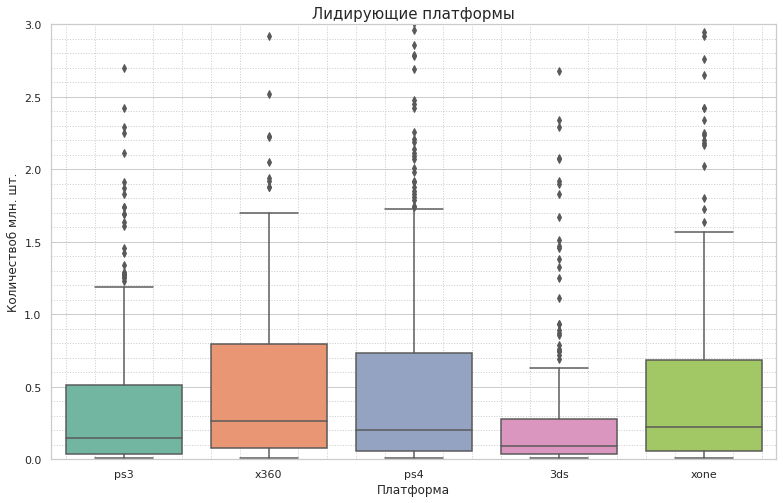

In [193]:
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (13, 8))
sns.boxplot(data = df_5_2012, x = 'platform', y = 'total_sale', palette = 'Set2')
plt.minorticks_on()
plt.grid(which = 'minor', linestyle = ':')
plt.title('Лидирующие платформы', fontsize = 15)
plt.ylabel('Количествоб млн. шт.')
plt.xlabel('Платформа')
plt.ylim(0, 3)
plt.show()

**Вывод:** Хорошо видно какие платформы выделяются - x360, ps4, xone, и ps3. Медианное значение находится в диапазоне от 0,18 до 0,38 млн. копий. У xone, x360, ps4 видим верхние границы, за которыми наблюдаются аномальные показатели - от 1,58 млн. и у ps3 от 1,2 млн. Самые низкие показатели имеет 3ds - медианна = 0,6 млн.

<a name = "2.5."></a><font size = "3"><b>2.5 Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Возьмем для анализа платформу ps4.

In [194]:
df_5_2012.head()

,name,platform,release,genre,na_sale,eu_sale,jp_sale,other_sale,cr_sc,us_sc,rating,total_sale
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97,8.2,m,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97,8.1,m,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,-1,-1.0,rp,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,-1,-1.0,rp,14.60
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97,8.3,m,12.62


In [195]:
pltform_ps4 = df_5_2012.query('platform == "ps4" & cr_sc > 0 & us_sc > 0')
pltform_ps4.head()

,name,platform,release,genre,na_sale,eu_sale,jp_sale,other_sale,cr_sc,us_sc,rating,total_sale
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97,8.3,m,12.62
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82,4.3,e,8.58
92,call of duty: advanced warfare,ps4,2014,shooter,2.81,3.48,0.14,1.23,83,5.7,m,7.66
94,fifa 17,ps4,2016,sports,0.66,5.75,0.08,1.11,85,5.0,e,7.60
105,fallout 4,ps4,2015,role-playing,2.53,3.27,0.24,1.13,87,6.5,m,7.17


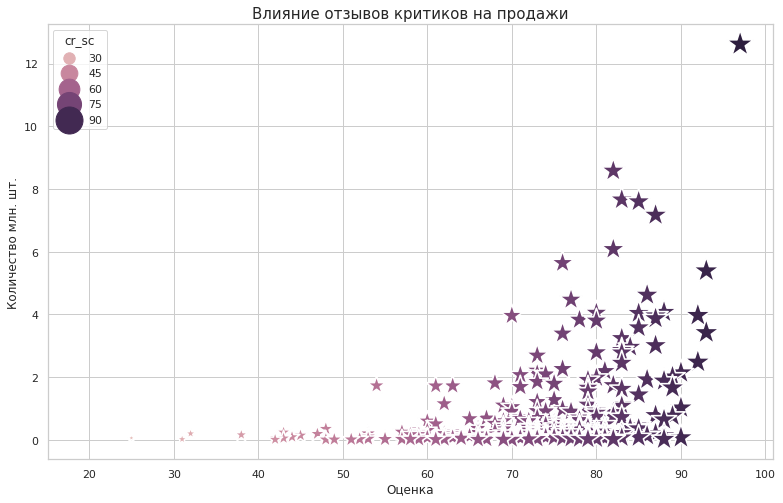

In [196]:
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (13, 8))
sns.scatterplot(data = pltform_ps4, x = 'cr_sc', y = 'total_sale', hue = 'cr_sc', size = 'cr_sc', sizes = (20, 800), marker = '*')
plt.title('Влияние отзывов критиков на продажи', fontsize = 15)
plt.ylabel('Количество млн. шт.')
plt.xlabel('Оценка')
plt.show()

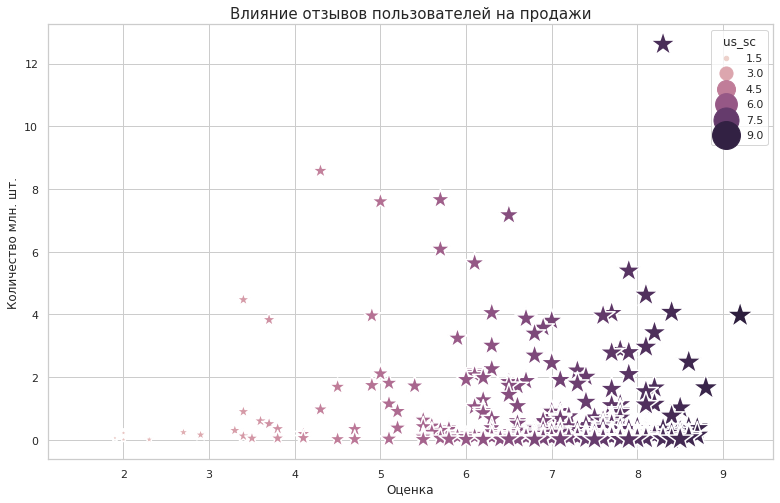

In [197]:
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (13, 8))
sns.scatterplot(data = pltform_ps4, x = 'us_sc', y = 'total_sale', hue = 'us_sc', size = 'us_sc', sizes = (20, 800), marker = '*')
plt.title('Влияние отзывов пользователей на продажи', fontsize = 15)
plt.ylabel('Количество млн. шт.')
plt.xlabel('Оценка')
plt.show()

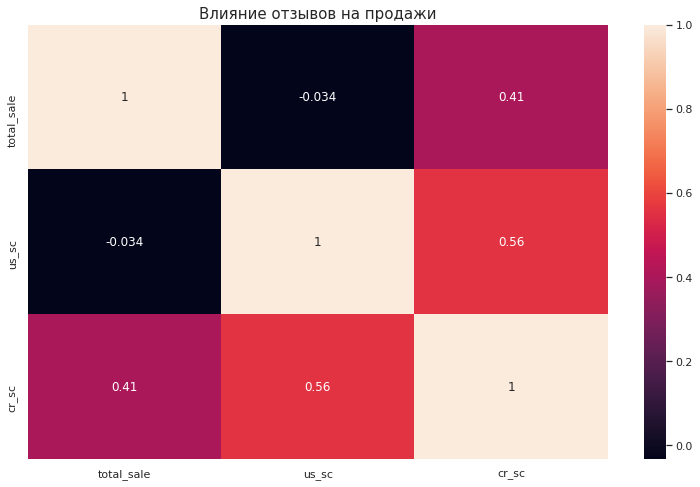

In [198]:
plt.figure(figsize = (13, 8))
sns.heatmap(pltform_ps4.loc[:,['total_sale', 'us_sc', 'cr_sc']].corr(),annot=True)
plt.title('Влияние отзывов на продажи', fontsize = 15)
plt.show()

**Вывод:** Графики практичеси одинаковые, оценка пользователей имеет немного больше разброс. Зависимость положительная(средняя зависимость 0,41), оценка критиков влияет на продажи игр. А вот оценка пользователей имеет отрицательную зависимость(-0,034) - довольно слабая, но отрицательная, хотя график показывает нам немного обратное.

<a name = "2.6."></a><font size = "3"><b>2.6 Соотнесем выводы с продажами игр на других платформах и посмотрим на общее распределение игр по жанрам</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

* Что можно сказать о самых прибыльных жанрах?
* Выделяются ли жанры с высокими и низкими продажами?

Для общей картины посмотрим на продажи за все года в разных отрезках.

In [199]:
df.head()

,name,platform,release,genre,na_sale,eu_sale,jp_sale,other_sale,cr_sc,us_sc,rating,total_sale
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,e,82.54
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1,-1.0,rp,31.38
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89,8.5,e,29.80


In [200]:
df_genre = df.pivot_table(index = 'genre', values = 'total_sale', aggfunc = 'sum').sort_values('total_sale', ascending = False)
df_genre

,total_sale
genre,
action,1646.62
sports,1266.73
shooter,976.24
role-playing,895.60
misc,776.53
racing,694.59
platform,640.59
fighting,411.05
simulation,381.84


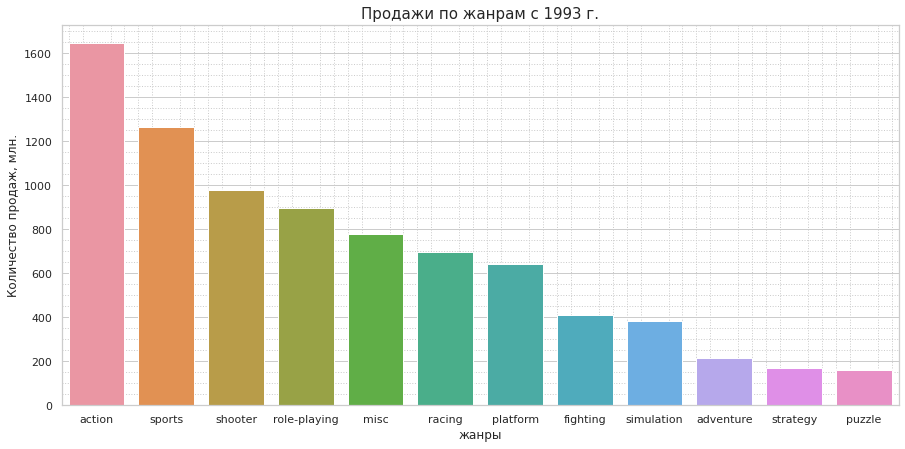

In [201]:
plt.figure(figsize = (15,7))
sns.barplot(data = df_genre, x = df_genre.index, y = 'total_sale')
plt.minorticks_on()
plt.grid(which = 'minor', linestyle = ':')
plt.ylabel('Количество продаж, млн.')
plt.xlabel('жанры')
plt.title('Продажи по жанрам с 1993 г.', fontsize = 15)
plt.show()

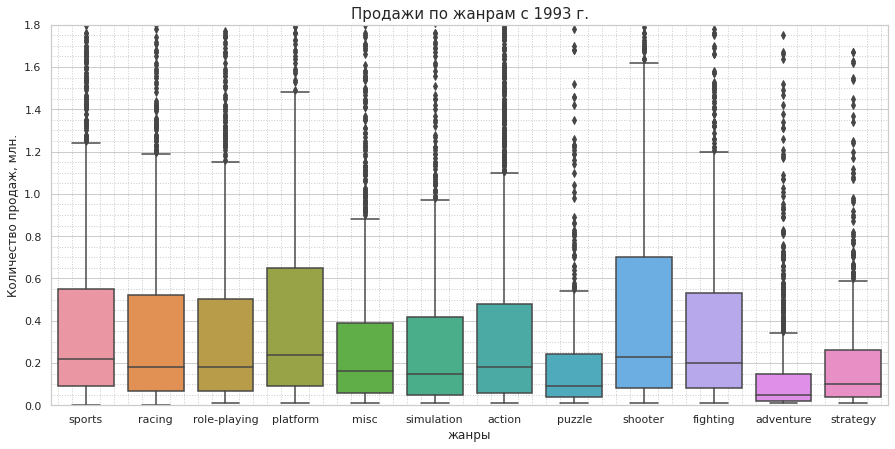

In [202]:
plt.figure(figsize = (15,7))
sns.boxplot(data = df, x = 'genre', y = 'total_sale')
plt.minorticks_on()
plt.grid(which = 'minor', linestyle = ':')
plt.ylabel('Количество продаж, млн.')
plt.xlabel('жанры')
plt.title('Продажи по жанрам с 1993 г.', fontsize = 15)
plt.ylim(0, 1.8)
plt.show()

**Вывод:** Можно отметить, что самыми продаваемыми играми с 1993 года являются Shooter, Fighting, Platform, затем уже Sports, Racing, Role-playing и только потом Action. Если смотреть на медианы, то выделим Shooter, Platform (0,225), затем можно выделить пятерку жанров Sports, Fighting, Role-playing, Racing и Action (от 0,19 до 0,21).

In [203]:
df_2005 = df.query('release > 2004')
df_genre_2005 = df_2005.pivot_table(index = 'genre', values = 'total_sale', aggfunc = 'sum').sort_values('total_sale', ascending = False)
df_genre_2005

,total_sale
genre,
action,1202.04
sports,853.33
shooter,758.56
misc,615.83
role-playing,550.78
racing,355.03
platform,303.06
simulation,269.62
fighting,208.07


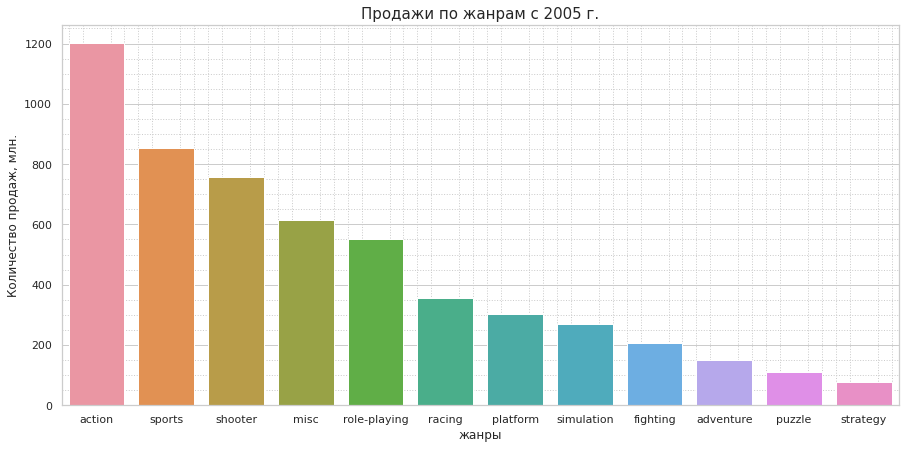

In [204]:
plt.figure(figsize = (15,7))
sns.barplot(data = df_genre_2005, x = df_genre_2005.index, y = 'total_sale')
plt.minorticks_on()
plt.grid(which = 'minor', linestyle = ':')
plt.ylabel('Количество продаж, млн.')
plt.xlabel('жанры')
plt.title('Продажи по жанрам c 2005 г.', fontsize = 15)
plt.show()

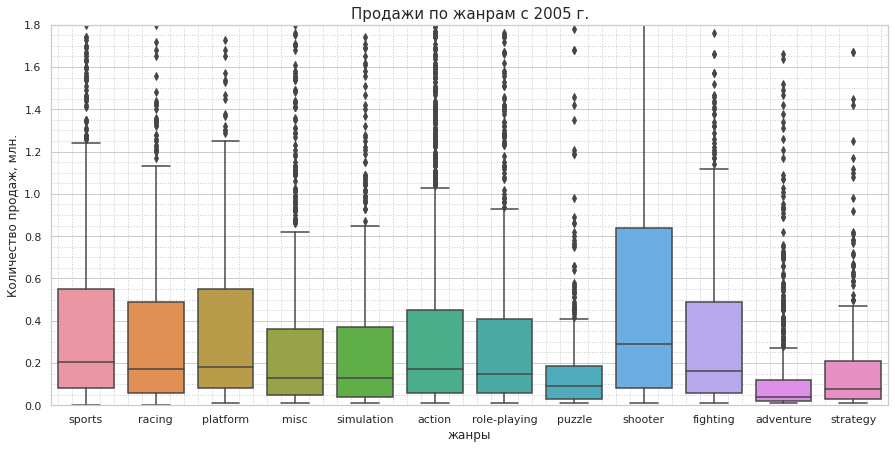

In [205]:
plt.figure(figsize = (15,7))
sns.boxplot(data = df_2005, x = 'genre', y = 'total_sale')
plt.minorticks_on()
plt.grid(which = 'minor', linestyle = ':')
plt.ylabel('Количество продаж, млн.')
plt.xlabel('жанры')
plt.title('Продажи по жанрам с 2005 г.', fontsize = 15)
plt.ylim(0, 1.8)
plt.show()

**Вывод:** Самыми продаваемыми играми с 2005 года являются Shooter(медианна 0,3), Sports и Platform(0,2), затем уже Action, Fighting, Racing(0,19).

In [206]:
df_2012 = df.query('release > 2012')
df_genre_2012 = df_2012.pivot_table(index = 'genre', values = 'total_sale', aggfunc = 'sum').sort_values('total_sale', ascending = False)
df_genre_2012

,total_sale
genre,
action,321.87
shooter,232.98
sports,150.65
role-playing,145.89
misc,62.82
platform,42.63
racing,39.89
fighting,35.31
adventure,23.64


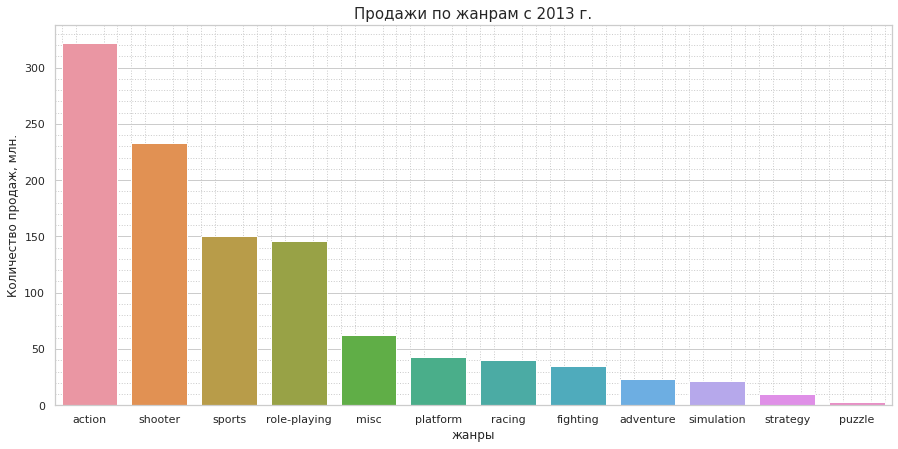

In [207]:
plt.figure(figsize = (15,7))
sns.barplot(data = df_genre_2012, x = df_genre_2012.index, y = 'total_sale')
plt.minorticks_on()
plt.grid(which = 'minor', linestyle = ':')
plt.ylabel('Количество продаж, млн.')
plt.xlabel('жанры')
plt.title('Продажи по жанрам с 2013 г.', fontsize = 15)
plt.show()

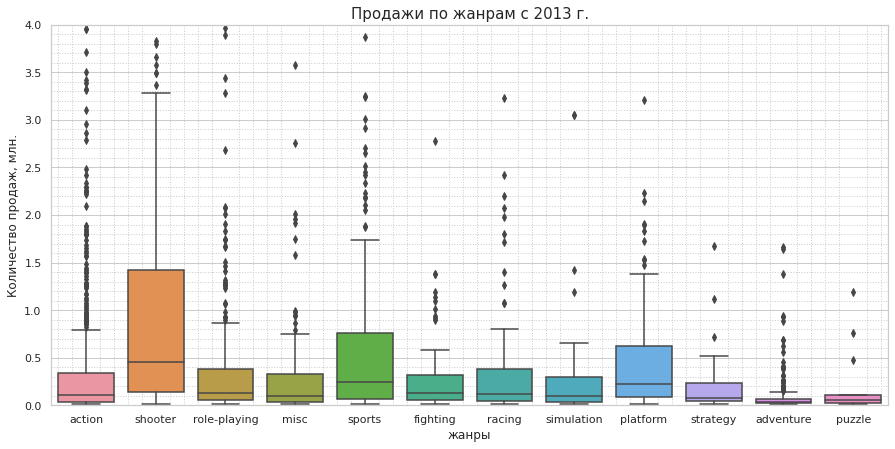

In [208]:
plt.figure(figsize = (15,7))
sns.boxplot(data = df_2012, x = 'genre', y = 'total_sale')
plt.minorticks_on()
plt.grid(which = 'minor', linestyle = ':')
plt.ylabel('Количество продаж, млн.')
plt.xlabel('жанры')
plt.title('Продажи по жанрам с 2013 г.', fontsize = 15)
plt.ylim(0, 4)
plt.show()

**Вывод:** И за последние несколько лет сильно выделяются Shooter, Sports, Platform потом Action, Role_playing, Racing, если смотреть по диаграме размаха. Общий график продаж показывает, что во все время больше всего популярными остаются Action и Shooter игры.

<a name = "3."></a><font size = "4"><b>3. Создание портрета пользователя каждого региона</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>
Определим для пользователя каждого региона (NA, EU, JP). Также возьмем актуальные года для анализа с 2013 года.

In [209]:
def plot(groupby, region_sale, ax):
    pivot = df_5_2012.groupby(groupby).agg({region_sale: 'sum'}).sort_values(by = region_sale, ascending = False)[:5]
    title_dict = {'na_sale': 'Продажи в Северной Америке', 'eu_sale': 'Продажи в Европе', 'jp_sale': 'Продажи в Японии'}
    color_dict = {'na_sale': 'gray', 'eu_sale': 'red', 'jp_sale': 'green'}
    plt = pivot.plot(kind = 'bar', ec = 'black', title = title_dict[region_sale], ax = axes[ax], fontsize=20, color = color_dict[region_sale], rot = 10)
    plt.legend(prop = {'size':18})
    plt.set_xlabel('')
    plt.title.set_size(20)

<a name = "3.1."></a><font size = "3"><b>3.1 Самые популярные платформы (топ-5)</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

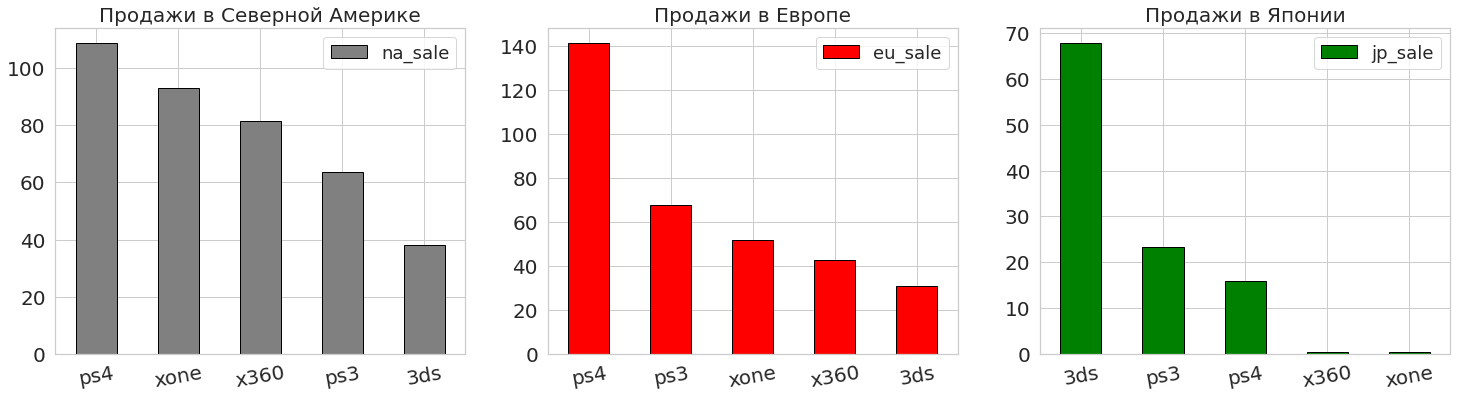

In [210]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

plot('platform', 'na_sale', 0)
plot('platform', 'eu_sale', 1)
plot('platform', 'jp_sale', 2)

**Вывод:** Мы взяли продажи с 2013 года. В Северной Америке больше всего популярна приставка ps4, затем xone и x360, в Европе в топе ps4, ps3, xone и затем идет x360, в Японии широко распространена nintendo 3ds, потом ps3 и ps4. x360 и xone в Японии совсем малоизвестна.

<a name = "3.2."></a><font size = "3"><b>3.2 Самые популярные жанры (топ-5)</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

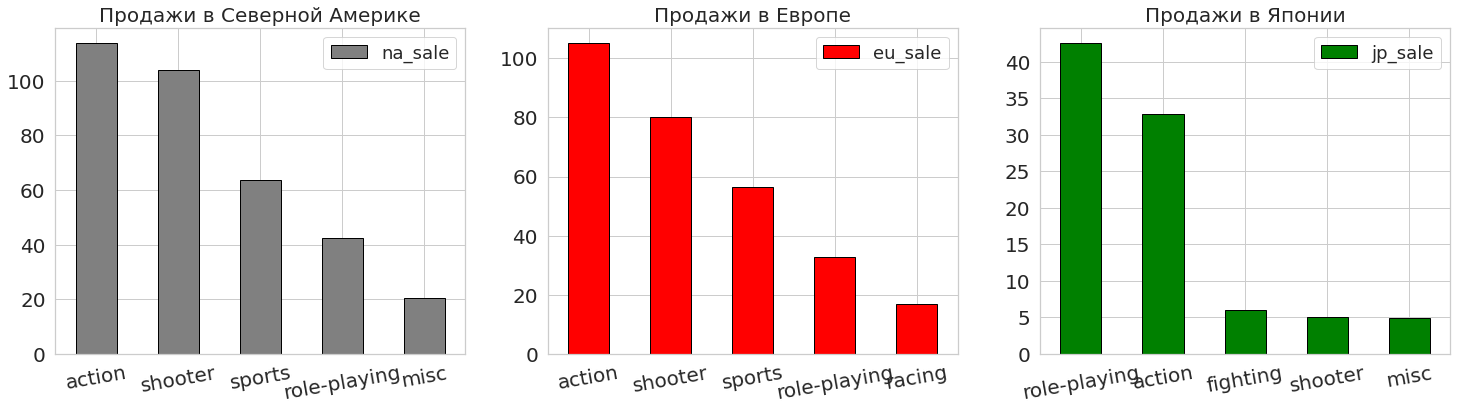

In [211]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

plot('genre', 'na_sale', 0)
plot('genre', 'eu_sale', 1)
plot('genre', 'jp_sale', 2)

**Вывод:** Сразу видно, что в Северной Америке и в Европе люди играют в одни и те же жанры, это экшн, шутеры, спортивные игры, ролевые игры и разницы только в самом минимальном жанре из топ-5 - в Америке играют в аркады, и в Европе больше известны гонки. А вот в Японии предпочтение отдается ролевым играм, экшин.

<a name = "3.3."></a><font size = "3"><b>3.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе?</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

**Entertainment Software Rating Board (ESRB)** — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.

**Категории рейтинга:**<br/>
* «EC» («Early childhood») — «Для детей младшего возраста от 3 лет»
* «E» («Everyone», gервоначально "K-A" ("Kids to Adults")) — «Для всех от 6 лет»
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
* «T» («Teen») — «Подросткам»
* «M» («Mature») — «Для взрослых»
* «AO» («Adults Only 18+») — «Только для взрослых»
* «RP» («Rating Pending») — «Рейтинг ожидается»

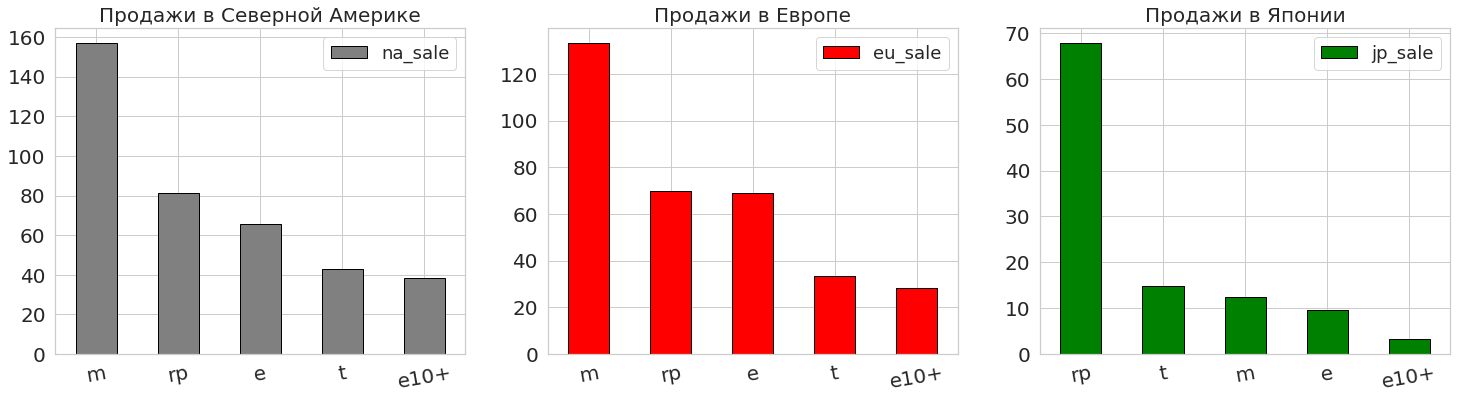

In [212]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

plot('rating', 'na_sale', 0)
plot('rating', 'eu_sale', 1)
plot('rating', 'jp_sale', 2)

**Вывод:** В Северной Америке больше всего игр с категорией рейтинга "Для взрослых", затем идут игры которые не имеют рейтинга и "Для всех от 6 лет", "Для подростков" и "Для всех от 10 лет и старше". В целом как и в Европе. В Японии много игр не имеющих рейтинга и затем идут игры практически на одном уровне с небольшим уменьшением "Для подростков", "Для взрослых", "Для всех от 6 лет" и "Для всех от 10 лет и старше".

<a name = "4."></a><font size = "4"><b>4. Проверка гипотез</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен- игры) и Sports (англ. «спортивные соревнования») разные.

Будем ориентироваться на года с 2013 года.

<a name = "4.1."></a><font size = "3"><b>4.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>
Возьмем alpha = **0.05**<br/>
**Нулевая гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.<br/>
**Альтернативная гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC различаются.<br/>
Будем сравнивать средние двух генеральных совокупностей между собой.

In [213]:
df.head()

,name,platform,release,genre,na_sale,eu_sale,jp_sale,other_sale,cr_sc,us_sc,rating,total_sale
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,e,82.54
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1,-1.0,rp,31.38
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89,8.5,e,29.80


In [214]:
x360 = df.query('release > 2012 & platform == "x360" & us_sc > 0')['us_sc']
pc = df.query('release > 2012 & platform == "pc" & us_sc > 0')['us_sc']

alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(x360, pc)

print('p - значение', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p - значение 0.15705535885466557
Не получилось отвергнуть нулевую гипотезу


In [215]:
print('Средняя оценка пользователей игр для платформы x360  - {:.2f}'.format(x360.mean()))
print('Средняя оценка пользователей игр для платформы pc - {:.2f}'.format(pc.mean()))

Средняя оценка пользователей игр для платформы x360  - 5.99
Средняя оценка пользователей игр для платформы pc - 6.27


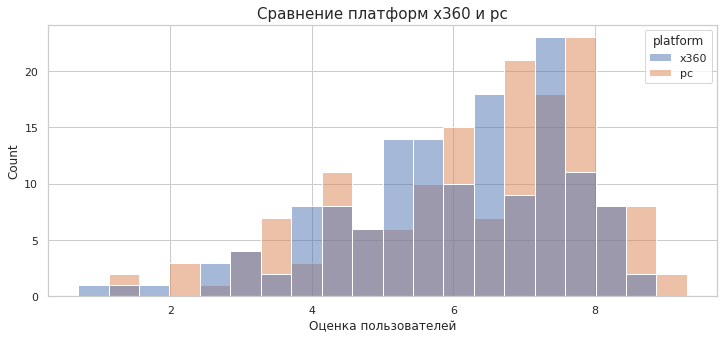

In [216]:
pltf = df.query('release > 2012 & platform == ["x360", "pc"] & us_sc > 0')
plt.figure(figsize = (12, 5))
sns.histplot(pltf, x = 'us_sc', hue = 'platform', bins = 20)
plt.title('Сравнение платформ x360 и pc', fontsize = 15)
plt.xlabel('Оценка пользователей')
plt.show()

**Вывод:** p - значение 0.157 это значение больше, чем критический уровень статистической значимости, который = 0.05, а значит не получилось отвергнуть нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Для анализа взяли период с 2013 года.

<a name = "4.2."></a><font size = "3"><b>4.2 Средние пользовательские рейтинги жанров Action и Sports разные</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>
Возьмем alpha = **0.05**<br/>
**Нулевая гипотеза:** Средние пользовательские рейтинги жанров Action и Sports одинаковые.<br/>
**Альтернативная гипотеза:** Средние пользовательские рейтинги жанров Action и Sports различаются.

In [217]:
action = df.query('release > 2012 & genre == "action" & us_sc > 0')['us_sc']
sports = df.query('release > 2012 & genre == "sports" & us_sc > 0')['us_sc']

alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(action, sports)

print('p - значение', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p - значение 1.0517832389140023e-27
Отвергаем нулевую гипотезу


In [218]:
print('Средняя оценка пользователей игр для платформы action  - {:.2f}'.format(action.mean()))
print('Средняя оценка пользователей игр для платформы sports - {:.2f}'.format(sports.mean()))

Средняя оценка пользователей игр для платформы action  - 6.84
Средняя оценка пользователей игр для платформы sports - 5.24


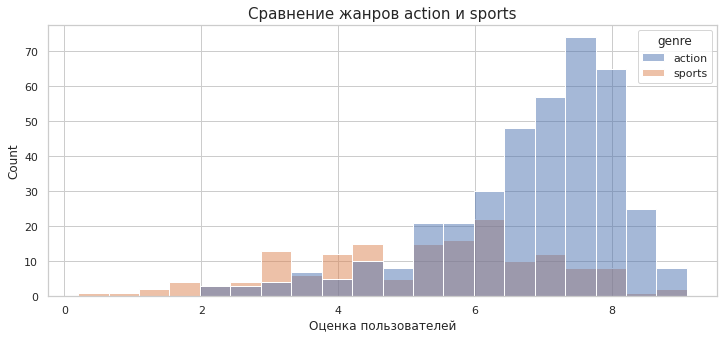

In [219]:
genre = df.query('release > 2012 & genre == ["action", "sports"] & us_sc > 0')
plt.figure(figsize = (12, 5))
sns.histplot(genre, x = 'us_sc', hue = 'genre', bins = 20)
plt.title('Сравнение жанров action и sports', fontsize = 15)
plt.xlabel('Оценка пользователей')
plt.show()

**Вывод:** p - значение = 1.0517832389140023e-27. Отвергаем нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports одинаковые. Это также прекрасно видно на графике.

<a name = "5."></a><font size = "4"><b>5. Общий вывод</b></font><br/>
<font size = "2">[содержание](#0.0)</font><br/>

<b>Цель проекта</b> было выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Мы работаем в интернет-магазине <font color = 'purple'><b>«Стримчик»</b></font>, который продаёт по всему миру
компьютерные игры.<br/>
<i>У нас имеются данные до 2016 года:</i><br/>
- о продажах игр, оценки пользователей и экспертов.
- жанры и платформы (например, Xbox или PlayStation).

<b>____</b>

<font size = 3><b>Изучили общую информацию и провели обработку данных</b></font><br/>

<b>Выделили некоторые замечания перед обработкой:</b><br/>
* в названиях игр имеются дубликаты, но это связано с тем, что одна игра находиться на разных платформах;
* в продажах есть нулевые значения, видимо игры себя не оправдали и продаж не было;
* есть пропуски в оценке игр, нужно будет проверить по какой причине и возможно ли их восстановить.


<b>Была изучена первичная информация по представленным данным:</b><br/>
* откорректировали название столбцов(перевели в нижний регистр, переименновали) - для удобства в использовании;
* перевели все строковые данные в нижний регистр, чтобы не возникло ошибок при дальнейшей обработки;
* проверили пропуски по таблице и удалили менее `2%`;
* посмотрели какие рейтинги игр бывают и некоторые из них объединили;
* добавили колонку с общими продажами `total_sale`;
* пустые значения в столбцах оценки заменили на "значение-заглушка", т.к. удалить мы не можем для нас важны данные из других столбцов и заменить мы не можем ведь это индивидуальная оценка для каждой игры;
* изменили тип данных в столбцах после их приведения в рабочий вид.

<b>____</b>

<font size = 3><b>Провели исследовательский анализ данных</b></font><br/>

<b>Ответили на вопросы:</b><br/>
* Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
        ► Не все данные важны, т.к. с 1980 по 1994 гг. мало выпускалось игр, скорее всего в силу слабого развития технологий. И только после 1994 года начался прогресс в развитии компьютерных игр с появлением компьютеров, а с 2000-х был сильный скачок вверх по популярности игр. Но с 2009 года видим спад, возможно, это связано с потерей интереса к играм из-за развития друго плана технологий.
* Как менялись продажи по платформам.
        ► Самыми продаваемыми играми были игры на PlayStation с 1997 года и пиком продаж с 2001 по 2006 гг. В 1998 году пик продаж PS составляет 169 млн. копий, PS2 в 2006 году составляет 211 млн. копий, PS3 в 2011 году - 156 млн. копий и PS4 в 2015 году - 118 млн. копий. Также были популярны wii в 2009 году продано 171 млн. копий, и X360 в 2010 году - 170 млн. копий. Средний срок жизни игровой платформы - 6 лет.
* Построили прогноз на 2017 год.
        ► Можно отметить, что за последние несколько лет стала преобладать платформа ps4 с положительной динамикой от старта продаж. Тренд нисходящий у платформ x360, 3ds, ps3. Можно спрогнозировать падение рынка и в следущем году. Но если взять во внимание платформу PS, то можно утверждать, что игры отлично продаются и с каждым выпуском следующей приставки продажи с каждым годом увеличиваются. И скорее всего падение интереса к платформе ps3 связана с выходом новой платформы. Поэтому, можно предположить и аналогичный, может быть и больший рост продаж платформы ps4 и выходом новых игр. И отметим, что платформа xone хорошо держит позиции и наблюдается положительная тенденция.
* Определим лидирущие плаформы по продажам и построим график «ящик с усами»
        ► Хорошо видно какие платформы выделяются - x360, ps4, xone, и ps3. Медианное значение находится в диапазоне от 0,18 до 0,38 млн. копий. У xone, x360, ps4 видим верхние границы, за которыми наблюдаются аномальные показатели - от 1,58 млн. и у ps3 от 1,2 млн. Самые низкие показатели имеет 3ds - медианна = 0,6 млн.
* Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков
        ► Графики практичеси одинаковые, оценка пользователей имеет немного больший разброс. Зависимость положительная(средняя зависимость 0,41), оценка критиков влияет на продажи игр. А вот оценка пользователей имеет отрицательную зависимость(-0,034) - довольно слабая, но отрицательная, хотя график показывает нам немного обратное.
* Соотнесем выводы с продажами игр на других платформах и посмотрим на общее распределение игр по жанрам
        ► Можно отметить, что самыми продаваемыми играми с 1993 года являются Shooter, Fighting, Platform, затем уже Sports, Racing, Role-playing и только потом Action. Если смотреть на медианы, то выделим Shooter, Platform (0,225), затем можно выделить пятерку жанров Sports, Fighting, Role-playing, Racing и Action (от 0,19 до 0,21).
        ► Самыми продаваемыми играми с 2005 года являются Shooter(медианна 0,3), Sports и Platform(0,2), затем уже Action, Fighting, Racing(0,19).
        ► И за последние несколько лет (с 2013 г.) сильно выделяются Shooter, Sports, Platform, потом Action, Role_playing, Racing, если смотреть по диаграме размаха. Общий график продаж показывает, что во все время больше всего популярными остаются Action игры.

<b>____</b>

<font size = 3><b>Создали портрет пользователя по каждому региону (Северная Америка, Европа и Япония)</b></font><br/>
**Выделили:**<br/>
* Самые популярные платформы (топ-5):
        ► Мы взяли продажи с 2013 года. В Северной Америке больше всего популярна приставка ps4, затем xone и x360, в Европе в топе ps4, ps3, xone и затем идет x360, в Японии широко распространена nintendo 3ds, потом ps3 и ps4. x360 и xone в Японии совсем малоизвестна.
* Самые популярные жанры (топ-5):
        ► В Северной Америке и в Европе люди играют в одни и те же жанры, это экшн, шутеры, спортивные игры, ролевые игры и разницы только в самом минимальном жанре из топ-5 - в Америке играют в аркады, и в Европе больше известны гонки. А вот в Японии предпочтение отдается ролевым играм, экшин.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?
        ► В Северной Америке больше всего игр с категорией рейтинга "Для взрослых", затем идут игры которые не имеют рейтинга и "Для всех от 6 лет", "Для подростков" и "Для всех от 10 лет и старше". В целом как и в Европе. В Японии много игр не имеющих рейтинга и затем идут игры практически на одном уровне с небольшим уменьшением "Для подростков", "Для взрослых", "Для всех от 6 лет" и "Для всех от 10 лет и старше".
        
<b>____</b>

<font size = 3><b>Проверка гипотез</b></font><br/>
Взяли alpha = <b>0.05</b><br/>
Будем сравнивать средние двух генеральных совокупностей между собой.<br/>
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

<b>Нулевая гипотеза:</b> Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.<br/>
<b>Альтернативная гипотеза:</b> Средние пользовательские рейтинги платформ Xbox One и PC различаются.<br/>

p - значение 0.157 это значение больше, чем критический уровень статистической значимости, который = 0.05, а значит не получилось отвергнуть нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Для анализа взяли период с 2013 года.


* Средние пользовательские рейтинги жанров Action и Sports разные

<b>Нулевая гипотеза:</b> Средние пользовательские рейтинги жанров Action и Sports одинаковые.<br/>
<b>Альтернативная гипотеза:</b> Средние пользовательские рейтинги жанров Action и Sports различаются.<br/>

p - значение = 1.0517832389140023e-27. Отвергаем нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports одинаковые.<br/>

<b>____</b>

<b>Отвечая на поставленный вопрос отметим:</b><br/>
на продажи влияют - на какой платформе создана игра, какого жанра и конечно положительная корреляция оценки критиков.

Из проведенного анализа можно выделить по популярности и отличным показателям продаж игр на платформу <font color = 'blue'><b>PlayStation</b></font>, если не брать в обзор Японию, там довольно своеобразный рынок и преобладает совсем иной жанр игр и соответственно платформы на которых играют. По жанрам отмечаеются Action, Sports и Shooter. Средняя продолжительность жизни платформ 6 лет и с каждой платформой выпускаются нового поколения игры и считаем, что люди очень сильно обращают внимание на качество игр (графика, активность, простота) и для этого требуются большие ресурсы, что нам показал анализ - слабо обеспеченные компании уходят с рынка. Сильно на рынок влияют оценки критиков.